In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [3]:
data = pd.read_csv('DJI.csv')

In [4]:
data.shape

(251, 7)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-30,25307.140625,25549.710938,25250.970703,25538.460938,25538.460938,482250000
1,2018-12-03,25779.570313,25980.210938,25670.509766,25826.429688,25826.429688,388480000
2,2018-12-04,25752.560547,25773.119141,25008.109375,25027.070313,25027.070313,418900000
3,2018-12-06,24737.419922,24951.009766,24242.220703,24947.669922,24947.669922,471690000
4,2018-12-07,24918.820313,25095.619141,24284.779297,24388.949219,24388.949219,398230000


In [6]:
data.drop(['Date', 'Adj Close', 'Volume'], axis = 1, inplace = True)

In [7]:
data.head()

,Open,High,Low,Close
0,25307.140625,25549.710938,25250.970703,25538.460938
1,25779.570313,25980.210938,25670.509766,25826.429688
2,25752.560547,25773.119141,25008.109375,25027.070313
3,24737.419922,24951.009766,24242.220703,24947.669922
4,24918.820313,25095.619141,24284.779297,24388.949219


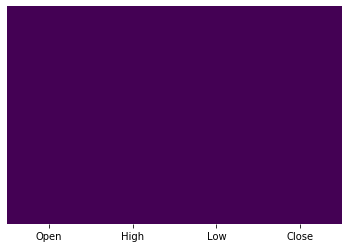

In [8]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'viridis')
plt.show()

# Data Preprocessing

In [9]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:].values

In [10]:
X.shape, Y.shape

((251, 3), (251, 1))

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200, 3), (200, 1), (51, 3), (51, 1))

# Creating Placeholders

In [14]:
tf.compat.v1.disable_eager_execution()

In [15]:
x = tf.compat.v1.placeholder(dtype = tf.float32, name = 'x')
y = tf.compat.v1.placeholder(dtype = tf.float32, name = 'y')

In [16]:
x, y

(<tf.Tensor 'x:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'y:0' shape=<unknown> dtype=float32>)

# Initialising weights and bias

In [17]:
w1 = tf.Variable(tf.compat.v1.random_uniform([x_train.shape[1],10]))
b1 = tf.Variable(tf.zeros([10]))


w2 = tf.Variable(tf.compat.v1.random_uniform([10, 5]))
b2 = tf.Variable(tf.zeros([5]))



wo = tf.Variable(tf.compat.v1.random_uniform([5, 1]))
bo = tf.Variable(tf.zeros([1]))



init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
w1, b1

(<tf.Variable 'Variable:0' shape=(3, 10) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32>)

In [19]:
w2, b2

(<tf.Variable 'Variable_2:0' shape=(10, 5) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(5,) dtype=float32>)

In [20]:
wo, bo

(<tf.Variable 'Variable_4:0' shape=(5, 1) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(1,) dtype=float32>)

# Forward propagation

In [21]:
hidden1 = tf.add(tf.matmul(x, w1), b1)
hidden1 = tf.nn.relu(hidden1)


#Layer2 propagation
hidden2 = tf.add(tf.matmul(hidden1, w2), b2)
hidden2 = tf.nn.relu(hidden2)



#Output Layer propagation
out = tf.add(tf.matmul(hidden2, wo), bo, name = 'out')

In [22]:
hidden1

<tf.Tensor 'Relu:0' shape=<unknown> dtype=float32>

In [23]:
hidden2

<tf.Tensor 'Relu_1:0' shape=<unknown> dtype=float32>

In [24]:
out

<tf.Tensor 'out:0' shape=<unknown> dtype=float32>

# Back Propagation

In [25]:
cost = tf.reduce_mean(tf.square(out - y))

In [26]:
train = tf.compat.v1.train.GradientDescentOptimizer(0.01).minimize(cost)

In [27]:
sess = tf.compat.v1.Session()
sess.run(init)

In [28]:
Training_loss = [ ]
Test_loss = [ ]
epoch = 2000
for i in range(epoch):
    sess.run(train, feed_dict = {x:x_train, y:y_train})
    
    Training_loss.append(sess.run(cost, feed_dict = {x: x_train, y: y_train}))
    Test_loss.append(sess.run(cost, feed_dict = {x: x_test, y: y_test}))
    

    print('Epoch :',i,'Training_loss :',Training_loss[i], 'Test_loss :', Test_loss[i])

Epoch : 0 Training_loss : 2.5215201e+19 Test_loss : 2.739148e+19
Epoch : 1 Training_loss : 5528418600000000.0 Test_loss : 5528449000000000.0
Epoch : 2 Training_loss : 5309493300000000.0 Test_loss : 5309523000000000.0
Epoch : 3 Training_loss : 5099237000000000.0 Test_loss : 5099267000000000.0
Epoch : 4 Training_loss : 4897307500000000.0 Test_loss : 4897336500000000.0
Epoch : 5 Training_loss : 4703374000000000.0 Test_loss : 4703402600000000.0
Epoch : 6 Training_loss : 4517120000000000.0 Test_loss : 4517148000000000.0
Epoch : 7 Training_loss : 4338242000000000.0 Test_loss : 4338269400000000.0
Epoch : 8 Training_loss : 4166448000000000.0 Test_loss : 4166474800000000.0
Epoch : 9 Training_loss : 4001456700000000.0 Test_loss : 4001482500000000.0
Epoch : 10 Training_loss : 3842999000000000.0 Test_loss : 3843024300000000.0
Epoch : 11 Training_loss : 3690816300000000.0 Test_loss : 3690841000000000.0
Epoch : 12 Training_loss : 3544659900000000.0 Test_loss : 3544684000000000.0
Epoch : 13 Training_

Epoch : 119 Training_loss : 46984526000000.0 Test_loss : 46987353000000.0
Epoch : 120 Training_loss : 45123937000000.0 Test_loss : 45126710000000.0
Epoch : 121 Training_loss : 43337030000000.0 Test_loss : 43339747000000.0
Epoch : 122 Training_loss : 41620890000000.0 Test_loss : 41623550000000.0
Epoch : 123 Training_loss : 39972707000000.0 Test_loss : 39975310000000.0
Epoch : 124 Training_loss : 38389785000000.0 Test_loss : 38392335000000.0
Epoch : 125 Training_loss : 36869547000000.0 Test_loss : 36872050000000.0
Epoch : 126 Training_loss : 35409514000000.0 Test_loss : 35411970000000.0
Epoch : 127 Training_loss : 34007300000000.0 Test_loss : 34009700000000.0
Epoch : 128 Training_loss : 32660607000000.0 Test_loss : 32662964000000.0
Epoch : 129 Training_loss : 31367247000000.0 Test_loss : 31369554000000.0
Epoch : 130 Training_loss : 30125102000000.0 Test_loss : 30127367000000.0
Epoch : 131 Training_loss : 28932150000000.0 Test_loss : 28934368000000.0
Epoch : 132 Training_loss : 2778644200

Epoch : 263 Training_loss : 139659080000.0 Test_loss : 139812780000.0
Epoch : 264 Training_loss : 134128640000.0 Test_loss : 134279230000.0
Epoch : 265 Training_loss : 128817200000.0 Test_loss : 128964770000.0
Epoch : 266 Training_loss : 123716090000.0 Test_loss : 123860700000.0
Epoch : 267 Training_loss : 118816980000.0 Test_loss : 118958694000.0
Epoch : 268 Training_loss : 114111880000.0 Test_loss : 114250740000.0
Epoch : 269 Training_loss : 109593080000.0 Test_loss : 109729190000.0
Epoch : 270 Training_loss : 105253250000.0 Test_loss : 105386615000.0
Epoch : 271 Training_loss : 101085280000.0 Test_loss : 101215986000.0
Epoch : 272 Training_loss : 97082360000.0 Test_loss : 97210425000.0
Epoch : 273 Training_loss : 93237950000.0 Test_loss : 93363460000.0
Epoch : 274 Training_loss : 89545790000.0 Test_loss : 89668760000.0
Epoch : 275 Training_loss : 85999830000.0 Test_loss : 86120350000.0
Epoch : 276 Training_loss : 82594300000.0 Test_loss : 82712396000.0
Epoch : 277 Training_loss : 79

Epoch : 405 Training_loss : 451486750.0 Test_loss : 459838980.0
Epoch : 406 Training_loss : 433664420.0 Test_loss : 441841630.0
Epoch : 407 Training_loss : 416547700.0 Test_loss : 424553600.0
Epoch : 408 Training_loss : 400109000.0 Test_loss : 407946780.0
Epoch : 409 Training_loss : 384321150.0 Test_loss : 391994340.0
Epoch : 410 Training_loss : 369158560.0 Test_loss : 376670400.0
Epoch : 411 Training_loss : 354596400.0 Test_loss : 361950080.0
Epoch : 412 Training_loss : 340610940.0 Test_loss : 347809630.0
Epoch : 413 Training_loss : 327179170.0 Test_loss : 334226050.0
Epoch : 414 Training_loss : 314279400.0 Test_loss : 321177440.0
Epoch : 415 Training_loss : 301890460.0 Test_loss : 308642620.0
Epoch : 416 Training_loss : 289992060.0 Test_loss : 296601300.0
Epoch : 417 Training_loss : 278564900.0 Test_loss : 285034080.0
Epoch : 418 Training_loss : 267590220.0 Test_loss : 273922140.0
Epoch : 419 Training_loss : 257050190.0 Test_loss : 263247550.0
Epoch : 420 Training_loss : 246927490.0 

Epoch : 546 Training_loss : 2937027.2 Test_loss : 3049143.2
Epoch : 547 Training_loss : 2877223.8 Test_loss : 2979206.2
Epoch : 548 Training_loss : 2819790.0 Test_loss : 2911842.0
Epoch : 549 Training_loss : 2764627.5 Test_loss : 2846947.2
Epoch : 550 Training_loss : 2711651.2 Test_loss : 2784433.0
Epoch : 551 Training_loss : 2660772.8 Test_loss : 2724208.0
Epoch : 552 Training_loss : 2611908.5 Test_loss : 2666183.8
Epoch : 553 Training_loss : 2564982.0 Test_loss : 2610280.8
Epoch : 554 Training_loss : 2519913.5 Test_loss : 2556415.5
Epoch : 555 Training_loss : 2476627.5 Test_loss : 2504508.5
Epoch : 556 Training_loss : 2435055.8 Test_loss : 2454487.5
Epoch : 557 Training_loss : 2395130.8 Test_loss : 2406283.2
Epoch : 558 Training_loss : 2356788.2 Test_loss : 2359826.2
Epoch : 559 Training_loss : 2319962.0 Test_loss : 2315048.0
Epoch : 560 Training_loss : 2284595.8 Test_loss : 2271889.5
Epoch : 561 Training_loss : 2250628.2 Test_loss : 2230284.8
Epoch : 562 Training_loss : 2218007.0 Te

Epoch : 683 Training_loss : 1432813.6 Test_loss : 1070079.1
Epoch : 684 Training_loss : 1432577.6 Test_loss : 1069207.1
Epoch : 685 Training_loss : 1432351.4 Test_loss : 1068357.6
Epoch : 686 Training_loss : 1432133.9 Test_loss : 1067528.8
Epoch : 687 Training_loss : 1431924.8 Test_loss : 1066720.8
Epoch : 688 Training_loss : 1431724.0 Test_loss : 1065933.0
Epoch : 689 Training_loss : 1431531.5 Test_loss : 1065165.4
Epoch : 690 Training_loss : 1431346.2 Test_loss : 1064416.6
Epoch : 691 Training_loss : 1431168.6 Test_loss : 1063686.5
Epoch : 692 Training_loss : 1430998.1 Test_loss : 1062974.8
Epoch : 693 Training_loss : 1430834.1 Test_loss : 1062280.1
Epoch : 694 Training_loss : 1430676.5 Test_loss : 1061602.2
Epoch : 695 Training_loss : 1430525.1 Test_loss : 1060941.4
Epoch : 696 Training_loss : 1430380.0 Test_loss : 1060296.9
Epoch : 697 Training_loss : 1430240.5 Test_loss : 1059667.8
Epoch : 698 Training_loss : 1430106.2 Test_loss : 1059053.8
Epoch : 699 Training_loss : 1429977.8 Te

Epoch : 827 Training_loss : 1426875.5 Test_loss : 1034053.8
Epoch : 828 Training_loss : 1426874.5 Test_loss : 1034018.5
Epoch : 829 Training_loss : 1426874.2 Test_loss : 1033984.0
Epoch : 830 Training_loss : 1426873.5 Test_loss : 1033950.4
Epoch : 831 Training_loss : 1426872.8 Test_loss : 1033917.6
Epoch : 832 Training_loss : 1426872.4 Test_loss : 1033884.7
Epoch : 833 Training_loss : 1426871.5 Test_loss : 1033852.7
Epoch : 834 Training_loss : 1426871.0 Test_loss : 1033821.6
Epoch : 835 Training_loss : 1426870.5 Test_loss : 1033791.3
Epoch : 836 Training_loss : 1426870.1 Test_loss : 1033761.0
Epoch : 837 Training_loss : 1426869.8 Test_loss : 1033731.6
Epoch : 838 Training_loss : 1426869.1 Test_loss : 1033702.9
Epoch : 839 Training_loss : 1426868.8 Test_loss : 1033675.06
Epoch : 840 Training_loss : 1426868.1 Test_loss : 1033647.3
Epoch : 841 Training_loss : 1426867.9 Test_loss : 1033620.25
Epoch : 842 Training_loss : 1426867.4 Test_loss : 1033594.06
Epoch : 843 Training_loss : 1426867.2

Epoch : 1029 Training_loss : 1426857.8 Test_loss : 1032335.5
Epoch : 1030 Training_loss : 1426857.9 Test_loss : 1032334.56
Epoch : 1031 Training_loss : 1426857.6 Test_loss : 1032333.9
Epoch : 1032 Training_loss : 1426857.8 Test_loss : 1032333.0
Epoch : 1033 Training_loss : 1426857.6 Test_loss : 1032332.25
Epoch : 1034 Training_loss : 1426857.8 Test_loss : 1032331.5
Epoch : 1035 Training_loss : 1426857.6 Test_loss : 1032330.7
Epoch : 1036 Training_loss : 1426857.9 Test_loss : 1032329.8
Epoch : 1037 Training_loss : 1426857.9 Test_loss : 1032329.0
Epoch : 1038 Training_loss : 1426857.9 Test_loss : 1032328.25
Epoch : 1039 Training_loss : 1426857.8 Test_loss : 1032327.5
Epoch : 1040 Training_loss : 1426857.9 Test_loss : 1032326.75
Epoch : 1041 Training_loss : 1426857.9 Test_loss : 1032325.8
Epoch : 1042 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1043 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1044 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1045 Trainin

Epoch : 1244 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1245 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1246 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1247 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1248 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1249 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1250 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1251 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1252 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1253 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1254 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1255 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1256 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1257 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1258 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1259 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1260 Training_lo

Epoch : 1384 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1385 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1386 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1387 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1388 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1389 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1390 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1391 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1392 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1393 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1394 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1395 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1396 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1397 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1398 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1399 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1400 Training_lo

Epoch : 1562 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1563 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1564 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1565 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1566 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1567 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1568 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1569 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1570 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1571 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1572 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1573 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1574 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1575 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1576 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1577 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1578 Training_lo

Epoch : 1732 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1733 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1734 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1735 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1736 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1737 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1738 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1739 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1740 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1741 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1742 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1743 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1744 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1745 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1746 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1747 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1748 Training_lo

Epoch : 1884 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1885 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1886 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1887 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1888 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1889 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1890 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1891 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1892 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1893 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1894 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1895 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1896 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1897 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1898 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1899 Training_loss : 1426857.9 Test_loss : 1032325.1
Epoch : 1900 Training_lo

In [29]:
y_pred = sess.run(out, feed_dict = {x:x_test})

In [30]:
len(y_pred)

51

In [31]:
y_pred[0:5]

array([[25989.865],
       [25989.865],
       [25989.865],
       [25989.865],
       [25989.865]], dtype=float32)

In [32]:
y_test[0:5]

array([[27359.160156],
       [25169.880859],
       [26452.660156],
       [27171.900391],
       [26783.490234]])

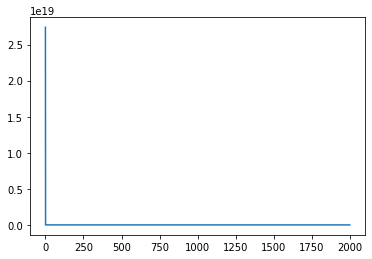

In [33]:
plt.plot(Test_loss)
plt.show()

# Saving the Model

In [34]:
saver = tf.compat.v1.train.Saver()
saver.save(sess,'models/yahoo_dataset.ckpt')

'models/yahoo_dataset.ckpt'

# Loading the model

In [41]:
with tf.compat.v1.Session() as ses:
    saver = tf.compat.v1.train.import_meta_graph('/home/admin1/Tensorflow/models/yahoo_dataset.ckpt.meta')
    model = saver.restore(ses, tf.train.latest_checkpoint('/home/admin1/Tensorflow/models/'))
    
    graph = tf.compat.v1.get_default_graph()
    input_x = graph.get_tensor_by_name("x:0")
    input_y = graph.get_tensor_by_name("y:0")
    
    output = graph.get_tensor_by_name("out:0")
    
    
    feed_dict = {input_x: x_test}
    predictions = output.eval(feed_dict = feed_dict)
    print(predictions)

INFO:tensorflow:Restoring parameters from /home/admin1/Tensorflow/models/yahoo_dataset.ckpt
[[25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]
 [25989.865]]
